In [234]:
import pandas as pd
import numpy as np
import math
import locale
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
df = pd.read_csv("./moore_data.csv", header=None)
df

,0,1,2,3,4,5
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
5,TMS 1000,"8,000",1974[7],Texas Instruments,"8,000 nm",NaN
6,MOS Technology 6502,"3,510[8]",1975,MOS Technology,"8,000 nm",21 mm²
7,Intel 8085,"6,500",1976,Intel,"3,000 nm",20 mm²
8,Zilog Z80,"8,500",1976,Zilog,"4,000 nm",18 mm²
9,Intel 8086,"29,000",1978,Intel,"3,000 nm",33 mm²


In [236]:
def drop_str(x):
    if x.find('[') > 0:
        x =  x.split('[')[0]
    for i in x:
        if not i.isnumeric():
            x = x.replace(i,'')
    return float(x)
               

In [237]:
df[2]=df[2].apply(lambda x: drop_str(x))
df[1]=df[1].apply(lambda x: drop_str(x))

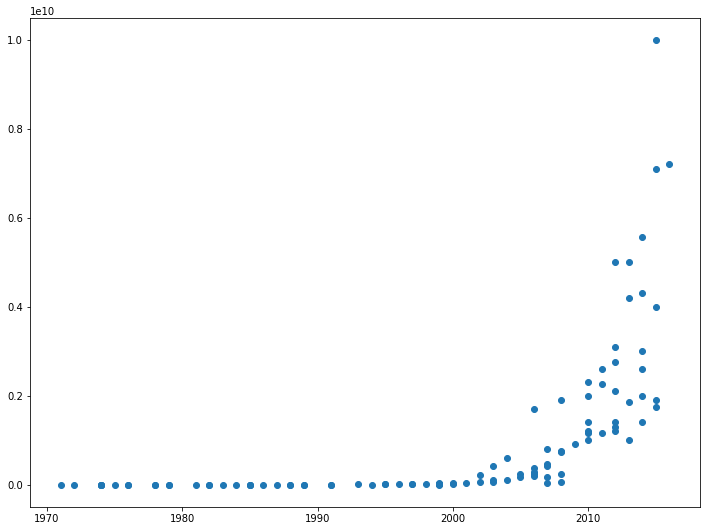

In [238]:
plt.figure(figsize = (12,9))
plt.scatter(df[2], df[1])


In [239]:
df[1] = df[1].apply(lambda x: math.log(x,2))


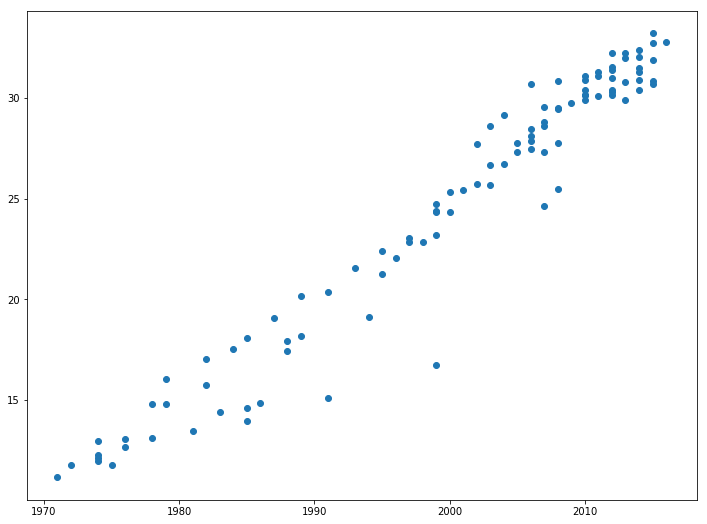

In [240]:
plt.figure(figsize = (12,9))
plt.scatter(df[2], df[1])

In [241]:
df[1] = df[1].apply(float)
df[2] = df[2].apply(float)

In [242]:
d = np.mean(df[2]**2) - np.mean(df[2])**2

w0 = (np.mean(df[1])*np.mean(df[2]**2) - np.mean(df[2])*np.mean(df[2]*df[1])) / d
w1 = (np.mean(df[2]*df[1]) - np.mean(df[2])*np.mean(df[1])) / d

y_hat = w0 + w1*df[2]

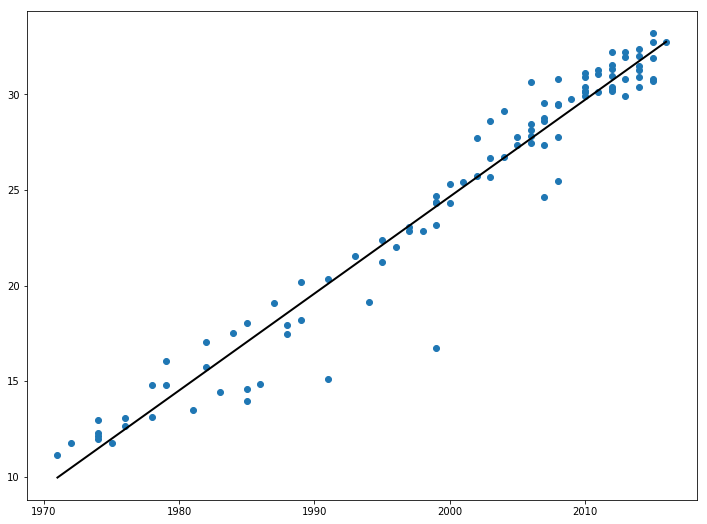

In [243]:
plt.figure(figsize = (12,9))
plt.scatter(df[2], df[1])
plt.plot(df[2], y_hat, color = "black", linewidth = 2)

In [244]:
r2 = 1 - np.sum((df[1] - y_hat)**2)/np.sum((df[1] - df[1].mean())**2)

print("R-squared: {}".format(r2))

R-squared: 0.9529442852285762


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
0    102 non-null object
1    102 non-null float64
2    102 non-null float64
3    102 non-null object
4    97 non-null object
5    95 non-null object
dtypes: float64(2), object(4)
memory usage: 4.9+ KB


In [246]:
df

,0,1,2,3,4,5
0,Intel 4004,11.167418,1971.0,Intel,"10,000 nm",12 mm²
1,Intel 8008,11.773139,1972.0,Intel,"10,000 nm",14 mm²
2,Intel 8080,12.135709,1974.0,Intel,"6,000 nm",20 mm²
3,Motorola 6800,12.001408,1974.0,Motorola,"6,000 nm",16 mm²
4,RCA 1802,12.287712,1974.0,RCA,"5,000 nm",27 mm²
5,TMS 1000,12.965784,1974.0,Texas Instruments,"8,000 nm",NaN
6,MOS Technology 6502,11.777255,1975.0,MOS Technology,"8,000 nm",21 mm²
7,Intel 8085,12.666224,1976.0,Intel,"3,000 nm",20 mm²
8,Zilog Z80,13.053247,1976.0,Zilog,"4,000 nm",18 mm²
9,Intel 8086,14.823765,1978.0,Intel,"3,000 nm",33 mm²
